sources



1 Additional feature to analyse:
Methane levels 800k years
sea ice coverage 
total solar irradiance


read up:


https://theconversation.com/the-three-minute-story-of-800-000-years-of-climate-change-with-a-sting-in-the-tail-73368#:~:text=Thousands%20of%20years%20of%20snow,has%20varied%20through%20the%20millennia.


Lead and lags: https://cp.copernicus.org/preprints/cp-2017-71/cp-2017-71.pdf

El Nino
Frequency analysis
Linear regression

Global GDP (https://ourworldindata.org/grapher/world-gdp-over-the-last-two-millennia?time=1900..latest)
Global population: (https://www.worldometers.info/world-population/world-population-by-year/)



FFT Function Fast Furier Transform for frequency analysis
https://www.youtube.com/watch?v=arYKpiVACvY
https://www.youtube.com/watch?v=sa7E9qUHYXw

Climate Change: Atmospheric Carbon Dioxide (https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)

CArbon Tracker video:(https://www.youtube.com/watch?v=I7jKxO4nKZc)

(check data from papers by Parrenin et al. 2013; Snyder et al. 2016, Bereiter et al. 2015)

IPCC report 2023:
https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_FullVolume.pdf

Citable Glossary : chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_AnnexesIndex.pdf

python:
Time series analysis and precidction: (https://www.youtube.com/watch?v=ilw2AnNsbIc)
Time series: (https://www.youtube.com/watch?v=huNTC4Zw2S8)



## set environment, import modules

In [288]:
import pandas as pd
# Successfully installed xlrd-2.0.1 - required install for operations with excel
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

### Import CO2_Luthi_et_al._2008_Nature (composite CO2) and EPICA Dome C Ice Core (Temperature)


In [289]:
#read in CO2 composit created in excel by lecturer

# Import Excel ref: https://datatofish.com/read_excel/
# skiprows: https://www.statology.org/pandas-read-excel-skip-rows/
dfCO2 = pd.read_excel("Data\CO2_Luthi_et_al._2008_Nature.xls", sheet_name="3.  Composite CO2", skiprows=6)
dfCO2.head()
dfCO2.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


#in the provided composit CO2 data, the latest data is only from 1813

In [290]:
# read in temperature from original source "EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt" 

#read in text data separated with multiple spaces (ref: https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas)
dfTemperature = pd.read_csv('Data/EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt', sep='\s+', skiprows=91).dropna()
dfTemperature.head()
dfTemperature=dfTemperature.drop(['Bag','ztop','Deuterium'],axis=1) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
dfTemperature.describe()

,Age,Temperature
count,5785.000000,5785.000000
mean,190506.560624,-4.580228
std,192554.547328,3.446971
min,38.373790,-10.580000
25%,46793.812500,-7.450000
50%,122110.190000,-5.200000
75%,273338.430000,-1.820000
max,801662.000000,5.460000


#without the NaN values our most mordern temperature data is only 38.37 (1988)

# Plot temperature and CO2 data on one graph

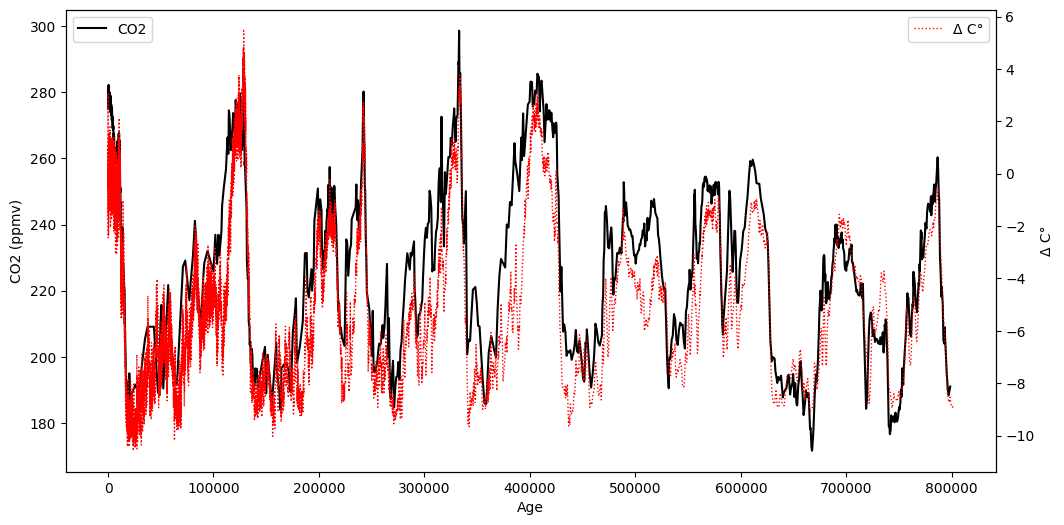

In [291]:
#Plot temperature and CO2 composit with dual y axis

#Dual axis (ref: https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/)

fig, ax1 = plt.subplots(figsize=(12,6))
ax2=ax1.twinx()


ax1.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'],color='black', label='CO2')
ax2.plot(dfTemperature['Age'],dfTemperature['Temperature'],color='r',label='Δ C°',lw=1,linestyle=':')
ax1.set_ylabel('CO2 (ppmv)')  # Set y-axis label
ax2.set_ylabel('Δ C°')  # Set y-axis label
ax1.set_xlabel('Age')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.legend()
plt.show()


#plt.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'])
#plt.plot(dfTemperature['Age'],dfTemperature['Temperature'],color='r')

In [292]:
#check correlation
dfCO2['CO2 (ppmv)'].corr(dfTemperature['Temperature'])

0.33458634081058536

In [293]:
CORollinMean=dfCO2.rolling(50).mean()
TempRollingMean=dfTemperature.rolling(50).mean()
CORollinMean['CO2 (ppmv)'].corr(TempRollingMean['Temperature'])

0.43873748064031814

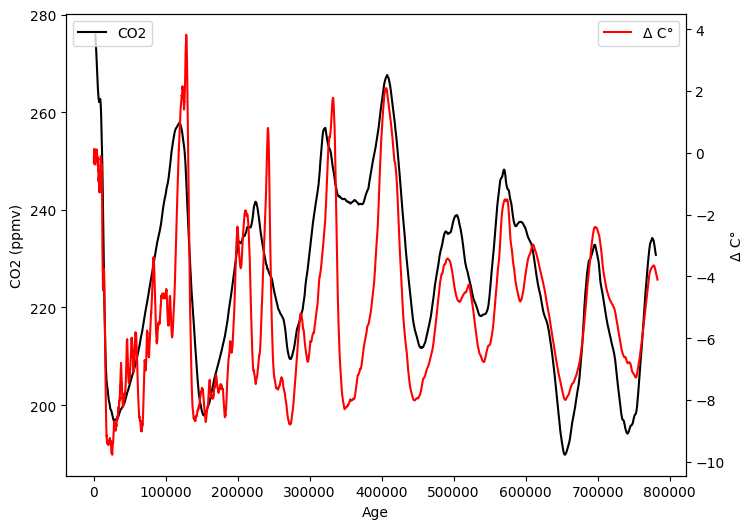

In [294]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax2=ax1.twinx()


ax1.plot(CORollinMean['EDC3_gas_a (yr)'], CORollinMean['CO2 (ppmv)'],color='black', label='CO2')
ax2.plot(TempRollingMean['Age'],TempRollingMean['Temperature'],color='r',label='Δ C°')
ax1.set_ylabel('CO2 (ppmv)')  # Set y-axis label
ax2.set_ylabel('Δ C°')  # Set y-axis label
ax1.set_xlabel('Age')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.legend()
plt.show()

On an 800kyear plot the 100 year difference between the last temperature and last CO2 data is not obvious

# Create composit CO2 and temperature data including modern samples for JSON and CSV output

In [295]:
# import individual source data for composit in CO2_Luthi_et_al._2008_Nature.xls created by lecturer Brian McGinley

# Import specific range of Excel in Python (ref: https://www.analytics-tuts.com/import-specific-range-of-excel-in-python/)

# Data collected and compiled into multiple ranges in one excel file by Lecturer: Brian McGinley
# Excel ranges point to columns: 'Gasage (EDC3, yr BP)' or equivalent & 'CO2 (ppmv)'

df_0_22 = pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='B,D',skiprows=6).dropna() # University of Bern, Dome C (0-22 kyr BP) - Monnin et al. (2001+2004)
df_0_440= pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='G,I',skiprows=6).dropna() # LGGE Grenoble, Vostok (0-440 kyr BP) - Petit et al. (1999), Pepin et al. (2001), Raynaud et al. (2005)
df_19_63= pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='K,L',skiprows=6).dropna() # University of Bern, Taylor Dome (19-63 kyr BP), Indermühle et al. (2000)
df_393_664=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='O,Q',skiprows=6).dropna() # University of Bern, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)
df_393_664_lgge=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='T,V',skiprows=6).dropna() # LGGE Grenoble, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)
df_611_800=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='X,Z',skiprows=6).dropna() # University of Bern, Dome C (611-800 kyr BP), Lüthi et al. (2008)
df_611_800_lgge=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AC,AE',skiprows=6).dropna() # LGGE Grenoble, Dome C (611-800 kyr BP), Lüthi et al. (2008)
df_35_68=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AI,AJ',skiprows=6).dropna() # University of Bern, Talos Dome (35-68 kyr BP), Bereiter et al. (2012)
df_49_115=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AM,AO',skiprows=6).dropna() # University of Bern, EDML (49-115 kyr BP), Bereiter et al. (2012) [1], Lüthi et al. (2010) [2]
df_19_88=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AS,AU',skiprows=6).dropna() # Oregon State University, Byrd (19-88 kyr BP), Ahn et al. (2008)
df_9_22=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AX,AZ',skiprows=6).dropna() # LGGE Grenoble, Byrd (19-88 kyr BP), Lourantou et al. (2010, a) (Global Biogeochemical Cycles)
df_125_153=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BC,BE',skiprows=6).dropna() # LGGE Grenoble, EDC (125- 153 kyr BP), Lourantou et al. (2010, b) (Quaternary Science Reviews)
df_12_24=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BH,BJ',skiprows=6).dropna() # University of Bern, EDC (12-24 kyr BP), Schmitt et al. (2011)
df_105_155=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BM,BO',skiprows=6).dropna() # University of Bern, EDC (105-155 kyr BP), Schneider et al. (2013)
df_0_2=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BQ,BR',skiprows=6).dropna() # CSIRO Australia, Law Dome (0-2 kyr BP), MacFarling Meure et al. (2006)
df_0_6=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BY,BZ',skiprows=6).dropna() # University of Bern, EDML (0-6 kyr BP), Monnin et al. (2004) [1], Siegenthaler et al. (2005) [2]
df_0_2_CSIRO2=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CF,CG',skiprows=6).dropna() # CSIRO Australia, Law Dome and South Pole (0-2 kyr BP), Rubino et al. (2013)
df_20_40=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CL,CM',skiprows=6).dropna() # Oregon State University, Siple Dome (20-40 kyr BP), Ahn et al. (2014, a) (Nature Communications)
df_7_9=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CP,CR',skiprows=6).dropna() # Oregon State University, Siple Dome (7.3 - 9 kyr BP), Ahn et al. (2014, b) (Geophysical Research Letters)
df_9_23=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CU,CV',skiprows=6).dropna() # Oregon State University, WAIS (9-23 kyr BP), Marcott et al. (2014)
df_560_806=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CY,CZ',skiprows=6).dropna() # University of Bern, EDC (560-806 kyr, corrected for analytical bias), Bereiter et al. (2014)

#df_9_23.tail()

In [296]:
# create my own composit (Python Composit vs Excel composit)
#concatenate dataframes into one composit - Python composit
dataframes = [df_0_22, df_0_440, df_19_63, df_393_664, df_393_664_lgge, df_611_800, df_611_800_lgge, df_35_68, df_49_115,
df_19_88,df_9_22,df_125_153,df_12_24,df_105_155,df_0_2,df_0_6,df_0_2_CSIRO2,df_20_40,df_7_9,df_9_23,df_560_806,]

PythonComposit_df = pd.DataFrame()

for df in dataframes:
    df.columns = ['Age', 'CO2']
    PythonComposit_df = pd.concat([PythonComposit_df, df], axis=0, ignore_index=True)

PythonComposit_df = PythonComposit_df.sort_values(by='Age')
#len(dataframes)#check if I have them all

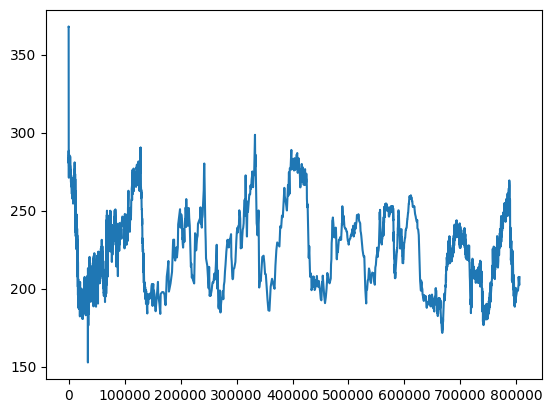

In [297]:
plt.plot(PythonComposit_df['Age'],PythonComposit_df['CO2'])

This includes modern data and matches paper: Climate Change: Atmospheric Carbon Dioxide (https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)

In [298]:
dfCO2_compo = pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="CO2 Composite", skiprows=14) # composit created in Excel by lecturer Brian McGinley
dfCO2_compo.columns

Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')

In [299]:
dfCO2_compo['Gasage (yr BP) '].min()
dfTemperature['Age'].min()

38.37379

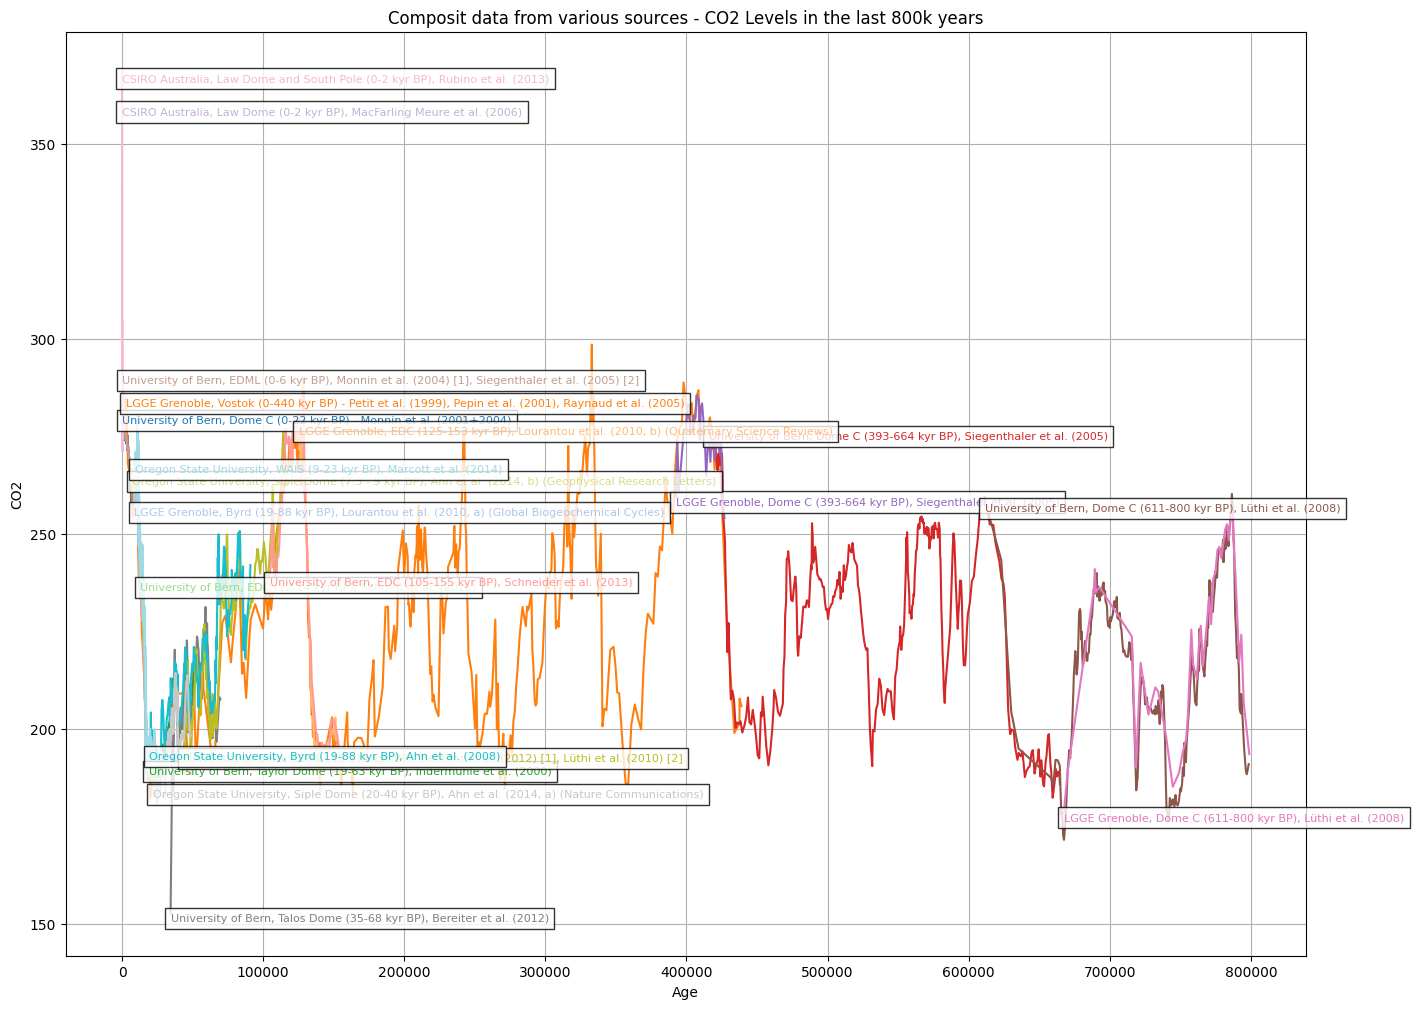

In [300]:
# da biiiiig composit from 'all records' worksheet

# List of dataframes
dataframes = [df_0_22, df_0_440, df_19_63, df_393_664, df_393_664_lgge, df_611_800, df_611_800_lgge, df_35_68, df_49_115,
              df_19_88, df_9_22, df_125_153, df_12_24, df_105_155, df_0_2, df_0_6, df_0_2_CSIRO2, df_20_40, df_7_9, df_9_23, df_560_806]

#labels = ["df_0_22", "df_0_440", "df_19_63", "df_393_664", "df_393_664_lgge", "df_611_800", "df_611_800_lgge", "df_35_68",
#          "df_49_115", "df_19_88", "df_9_22", "df_125_153", "df_12_24", "df_105_155", "df_0_2", "df_0_6", "df_0_2_CSIRO2",
#          "df_20_40", "df_7_9", "df_9_23", "df_560_806"]

# List of sources
labels = [
    "University of Bern, Dome C (0-22 kyr BP) - Monnin et al. (2001+2004)",
    "LGGE Grenoble, Vostok (0-440 kyr BP) - Petit et al. (1999), Pepin et al. (2001), Raynaud et al. (2005)",
    "University of Bern, Taylor Dome (19-63 kyr BP), Indermühle et al. (2000)",
    "University of Bern, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)",
    "LGGE Grenoble, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)",
    "University of Bern, Dome C (611-800 kyr BP), Lüthi et al. (2008)",
    "LGGE Grenoble, Dome C (611-800 kyr BP), Lüthi et al. (2008)",
    "University of Bern, Talos Dome (35-68 kyr BP), Bereiter et al. (2012)",
    "University of Bern, EDML (49-115 kyr BP), Bereiter et al. (2012) [1], Lüthi et al. (2010) [2]",
    "Oregon State University, Byrd (19-88 kyr BP), Ahn et al. (2008)",
    "LGGE Grenoble, Byrd (19-88 kyr BP), Lourantou et al. (2010, a) (Global Biogeochemical Cycles)",
    "LGGE Grenoble, EDC (125-153 kyr BP), Lourantou et al. (2010, b) (Quaternary Science Reviews)",
    "University of Bern, EDC (12-24 kyr BP), Schmitt et al. (2011)",
    "University of Bern, EDC (105-155 kyr BP), Schneider et al. (2013)",
    "CSIRO Australia, Law Dome (0-2 kyr BP), MacFarling Meure et al. (2006)",
    "University of Bern, EDML (0-6 kyr BP), Monnin et al. (2004) [1], Siegenthaler et al. (2005) [2]",
    "CSIRO Australia, Law Dome and South Pole (0-2 kyr BP), Rubino et al. (2013)",
    "Oregon State University, Siple Dome (20-40 kyr BP), Ahn et al. (2014, a) (Nature Communications)",
    "Oregon State University, Siple Dome (7.3 - 9 kyr BP), Ahn et al. (2014, b) (Geophysical Research Letters)",
    "Oregon State University, WAIS (9-23 kyr BP), Marcott et al. (2014)",
    "University of Bern, EDC (560-806 kyr, corrected for analytical bias), Bereiter et al. (2014)"
]

linecolors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5"
]

plt.figure(figsize=(16, 12))

for df, label, color in zip(dataframes, labels, linecolors):
    plt.plot(df.iloc[:, 0], df.iloc[:, 1], label=label, color=color)
# add labels
    plt.text(df.iloc[0, 0], df.iloc[0, 1], label, fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8), color=color)

plt.xlabel('Age')
plt.ylabel('CO2')
plt.title('Composit data from various sources - CO2 Levels in the last 800k years')
plt.grid(True)
plt.show()



In [301]:
# read in modern global temperature from original source "temperature_Arc-HalletLake.McKay.2008.txt" 

#read in text data separated with multiple spaces (ref: https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas)
dfTemp_modern = pd.read_csv('Data/temperature_Arc-HalletLake.McKay.2008.txt', sep='\s+', skiprows=222)
dfTemp_modern = dfTemp_modern.drop(['year','uncertainty_temperatureduration','thickness','BSi'],axis=1)
dfTemp_modern = dfTemp_modern.reset_index(drop=True)
dfTemp_modern=dfTemp_modern.rename(columns={'age':'Age','temperature':'Temperature'})
dfTemp_modern.tail()
dfTemperature.head()
Temperature = pd.concat([dfTemp_modern, dfTemperature], axis=0, ignore_index=True)
Temperature.head()

,Age,Temperature
0,-55.103134,3.037326
1,-53.304797,3.031934
2,-51.500338,2.436463
3,-49.689776,1.275921
4,-47.873136,0.603854


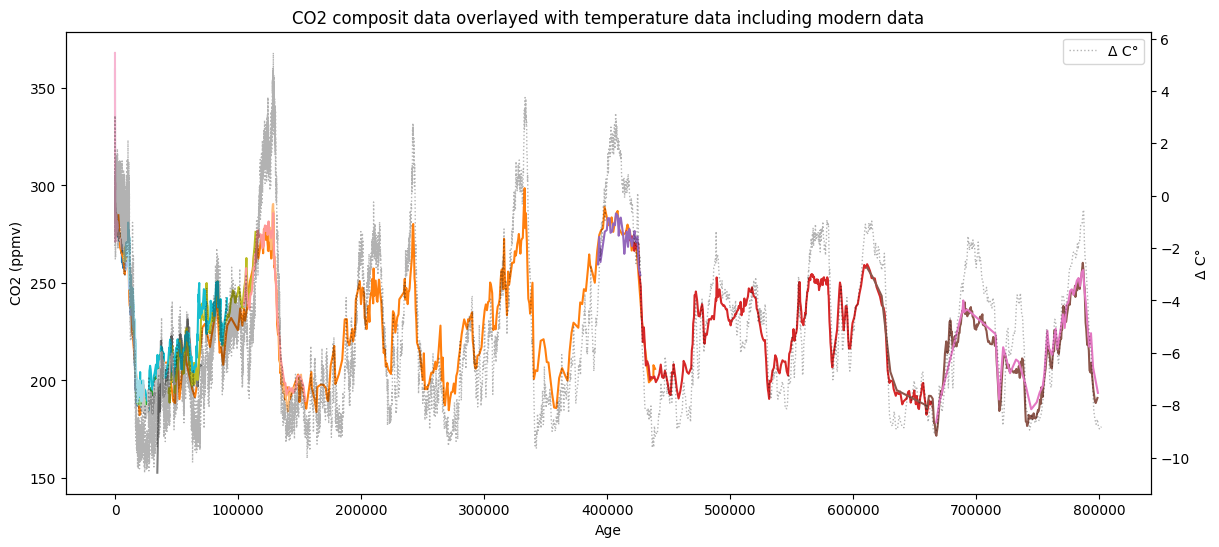

In [302]:
linecolors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5"]

fig, ax2 = plt.subplots(figsize=(14, 6))
ax1 = ax2.twinx()

# ax1.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'], color='black', label='CO2')
ax1.plot(Temperature['Age'], Temperature['Temperature'], color='black', label='Δ C°', alpha=0.3, lw=1,linestyle=':')
ax2.set_ylabel('CO2 (ppmv)')  # Set y-axis label
ax1.set_ylabel('Δ C°')  # Set y-axis label
ax2.set_xlabel('Age')


for df, label, color in zip(dataframes, labels, linecolors):
    ax2.plot(df.iloc[:, 0], df.iloc[:, 1], color=color)
    # add labels
    #ax2.text(df.iloc[0, 0], df.iloc[0, 1], label, fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8), color=color)
ax1.legend(loc='upper right')
#ax2.legend(loc='upper left')
plt.title("CO2 composit data overlayed with temperature data including modern data")
plt.show()


In [303]:
CO2_data=PythonComposit_df
T_data=Temperature
CO2_data.describe()
T_data.describe()

,Age,Temperature
count,5959.000000,5959.000000
mean,184963.040380,-4.446488
std,192396.258155,3.484963
min,-55.103134,-10.580000
25%,40417.476600,-7.390000
50%,118366.380000,-5.070000
75%,264080.960000,-1.460000
max,801662.000000,5.460000


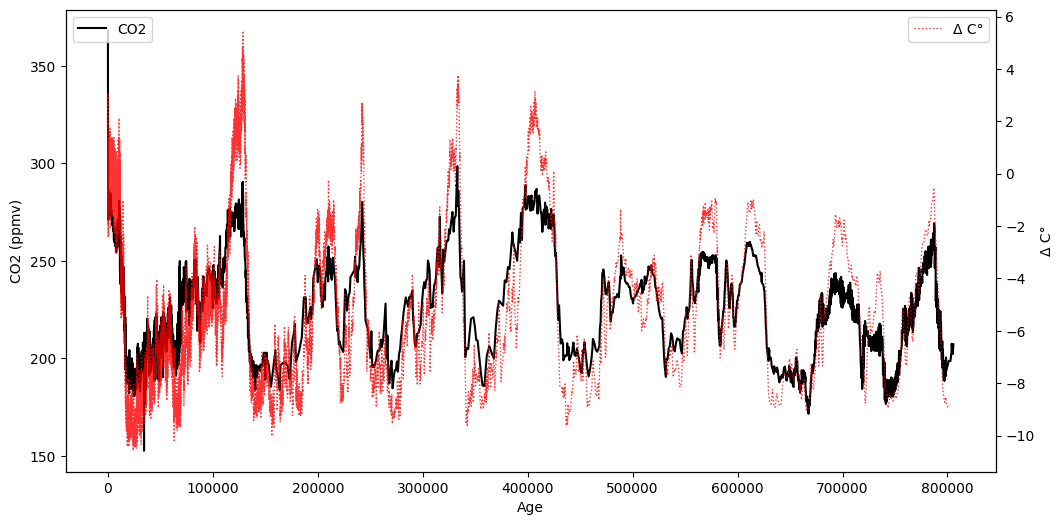

In [304]:
#Plot temperature and CO2 composit with dual y axis

#Dual axis (ref: https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/)

fig, ax1 = plt.subplots(figsize=(12,6))
ax2=ax1.twinx()

ax1.plot(CO2_data['Age'], CO2_data['CO2'],color='black', label='CO2',alpha=1) #CO2

ax2.plot(T_data['Age'],T_data['Temperature'],color='r',label='Δ C°',lw=1,linestyle=':',alpha=0.8)#temp

ax1.set_ylabel('CO2 (ppmv)')  # Set y-axis label
ax2.set_ylabel('Δ C°')  # Set y-axis label
ax1.set_xlabel('Age')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.legend()
plt.show()

# time series analysis
# continue with this ->    https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python


https://www.timescale.com/blog/how-to-work-with-time-series-in-python/#:~:text=Python%20provides%20the%20Matplotlib%20library,%2C%20scatter%20plots%2C%20and%20histograms.&text=Performing%20time%2Dseries%20analysis%20involves,trends%2C%20and%20other%20valuable%20insights.

https://www.timescale.com/blog/what-is-time-series-analysis-with-examples-and-applications/


In [305]:
CO2_data['CO2'].corr(T_data['Temperature'])
T_data['Temperature'].corr(CO2_data['CO2'])

-0.1066420903764231

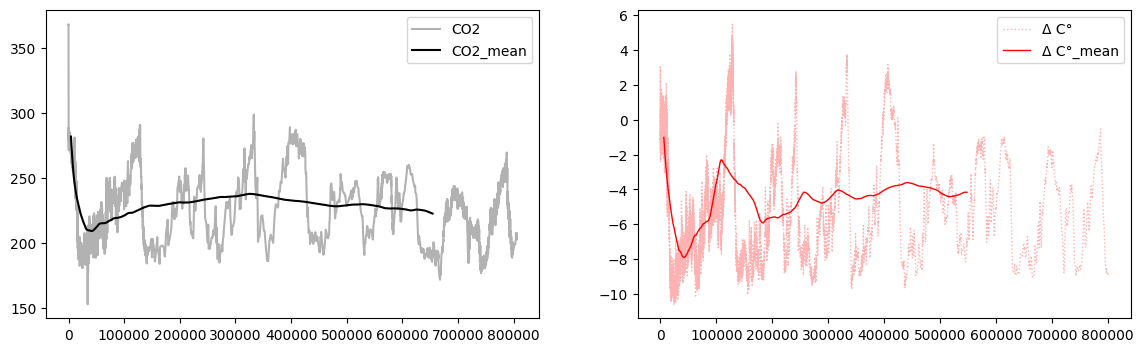

In [325]:
# rolling mean

fig, axs = plt.subplots(1,2, figsize=(14,4)) # 1 row, 3 columns
#CO2
rollmean_CO2=CO2_data.rolling(1000).mean()
axs[0].plot(CO2_data['Age'], CO2_data['CO2'],color='black', label='CO2',alpha=0.3) #CO2
axs[0].plot(rollmean_CO2['Age'], rollmean_CO2['CO2'],color='black', label='CO2_mean') #CO2
axs[0].legend()
#temperature
rollmean_T=T_data.rolling(1000).mean()
axs[1].plot(T_data['Age'],T_data['Temperature'],color='r',label='Δ C°',lw=1,linestyle=':',alpha=0.3)#temp
axs[1].plot(rollmean_T['Age'],rollmean_T['Temperature'],color='r',label='Δ C°_mean',lw=1,linestyle='-')#temp
axs[1].legend()

In [307]:
rollmean_CO2=CO2_data.rolling(50).mean()
rollmean_T=T_data.rolling(100).mean()

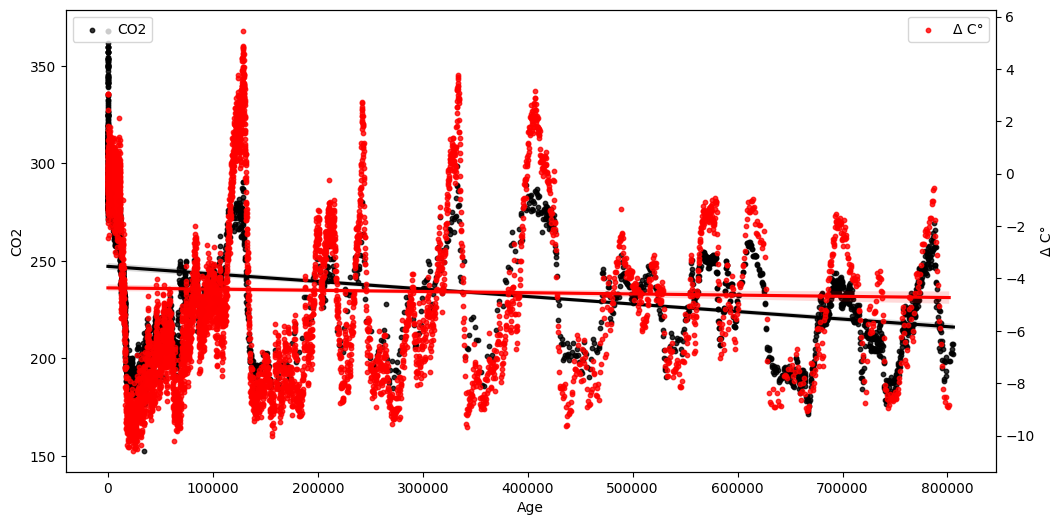

In [308]:
#Adding trendlines with seaborn regplot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot CO2 data and add a trendline
sns.regplot(x=CO2_data['Age'], y=CO2_data['CO2'], data=dfCO2, ax=ax1, color='black', label='CO2', scatter_kws={'s': 10}) #CO2
sns.regplot(x=T_data['Age'], y=T_data['Temperature'], data=dfTemperature, ax=ax2, color='red', label='Δ C°', scatter_kws={'s': 10, 'marker': 'x'}) #temperature

ax1.set_ylabel('CO2')  # Set y-axis label
ax2.set_ylabel('Δ C°')  # Set y-axis label
ax1.set_xlabel('Age')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


# Time series analysis

Trend
A trend is observed when there is an increasing or decreasing slope observed in the time series.
+ increasing CO2 and temperature

Seasonality - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.
+ winter/summer - in such long timeline it's not visible

Cyclic Variations./ Cyclical Component - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
+ ice ages

Irregular variation - Irregular Variation - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.

ETS Decomposition - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.


1 Dependence- It refers to the association of two observations of the same variable at prior time periods.

2 Stationarity- It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.

3 Differencing- Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.

4 Specification - It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models.

5 Exponential Smoothing - Exponential smoothing in time series analysis predicts the one next period value based on the past and current value. It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other. The exponential smoothing method is used to predict the short term prediction.

6 Curve fitting - Curve fitting regression in time series analysis is used when data is in a non-linear relationship.

7 ARIMA - ARIMA stands for Auto Regressive Integrated Moving Average.


###### Components of Time Series (ref: https://www.toppr.com/guides/business-mathematics-and-statistics/time-series-analysis/components-of-time-series/) <br> Complete Guide on Time Series Analysis in Python (ref: (https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python))



time series forecast
https://www.kaggle.com/code/kanncaa1/time-series-prediction-tutorial-with-eda
